In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [89]:
L_data = pd.read_csv('L_data_merged.csv', low_memory = False)

In [90]:
L_data['date'] = pd.to_datetime(L_data['date'], infer_datetime_format=True)

In [91]:
L_data_1yr = L_data.loc[(L_data['date']>= "12-31-2018") & (L_data['date']<= "12-30-2019")]

L_data_1_yr = L_data_1yr.dropna()
L_data_1_yr

,date,daytype,rides,Station Name,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,Neighborhood,City
932198,2018-12-31,W,973,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
932260,2018-12-31,W,1254,Pulaski (Green Line),True,False,False,True,False,False,False,False,False,False,"(41.885412, -87.725404)",Garfield Park,Chicago
932291,2018-12-31,W,3310,"Quincy/Wells (Brown, Orange, Purple & Pink Lines)",False,False,False,False,True,False,False,False,False,False,"(41.878723, -87.63374)",Chicago Loop,Chicago
932353,2018-12-31,W,2454,Belmont (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.938132, -87.712359)",Avondale,Chicago
932384,2018-12-31,W,2708,Jackson (Blue Line),True,False,True,False,False,False,False,False,False,False,"(41.878183, -87.629296)",Chicago Loop,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988852,2019-12-26,W,8264,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
988853,2019-12-27,W,7871,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
988854,2019-12-28,A,4474,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
988855,2019-12-29,U,3750,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago


In [92]:
#for n in L_data_1_yr["Neighborhood"]:
#    L_data_1_yr["rides"].sum()
n_by_state = L_data_1_yr.groupby(["rides","date"])["Neighborhood"].sum()
n_by_state
#print(n)

rides  date      
0      2019-03-09                   Avondale
       2019-03-16                   Avondale
       2019-03-17                   Avondale
       2019-03-24                   Avondale
       2019-08-24    Near West SideWest Loop
                              ...           
24291  2019-06-14               Chicago Loop
24388  2019-09-13               Chicago Loop
24544  2019-06-30             Lake View East
25610  2019-11-22               Chicago Loop
27255  2019-10-23               Chicago Loop
Name: Neighborhood, Length: 44408, dtype: object

In [93]:
daily_1819 = L_data_1_yr.groupby(['date','Neighborhood']).agg({
    'rides': 'sum'
})

In [94]:
daily_1819

rides
date       Neighborhood          
2018-12-31 Albany Park       3250
           Archer Heights    2338
           Armour Square     2186
           Austin            4834
           Avondale          2454
...                           ...
2019-12-30 Washington Park    695
           West Englewood     682
           West Loop         7195
           West Town         8639
           Woodlawn          1008

[18980 rows x 1 columns]

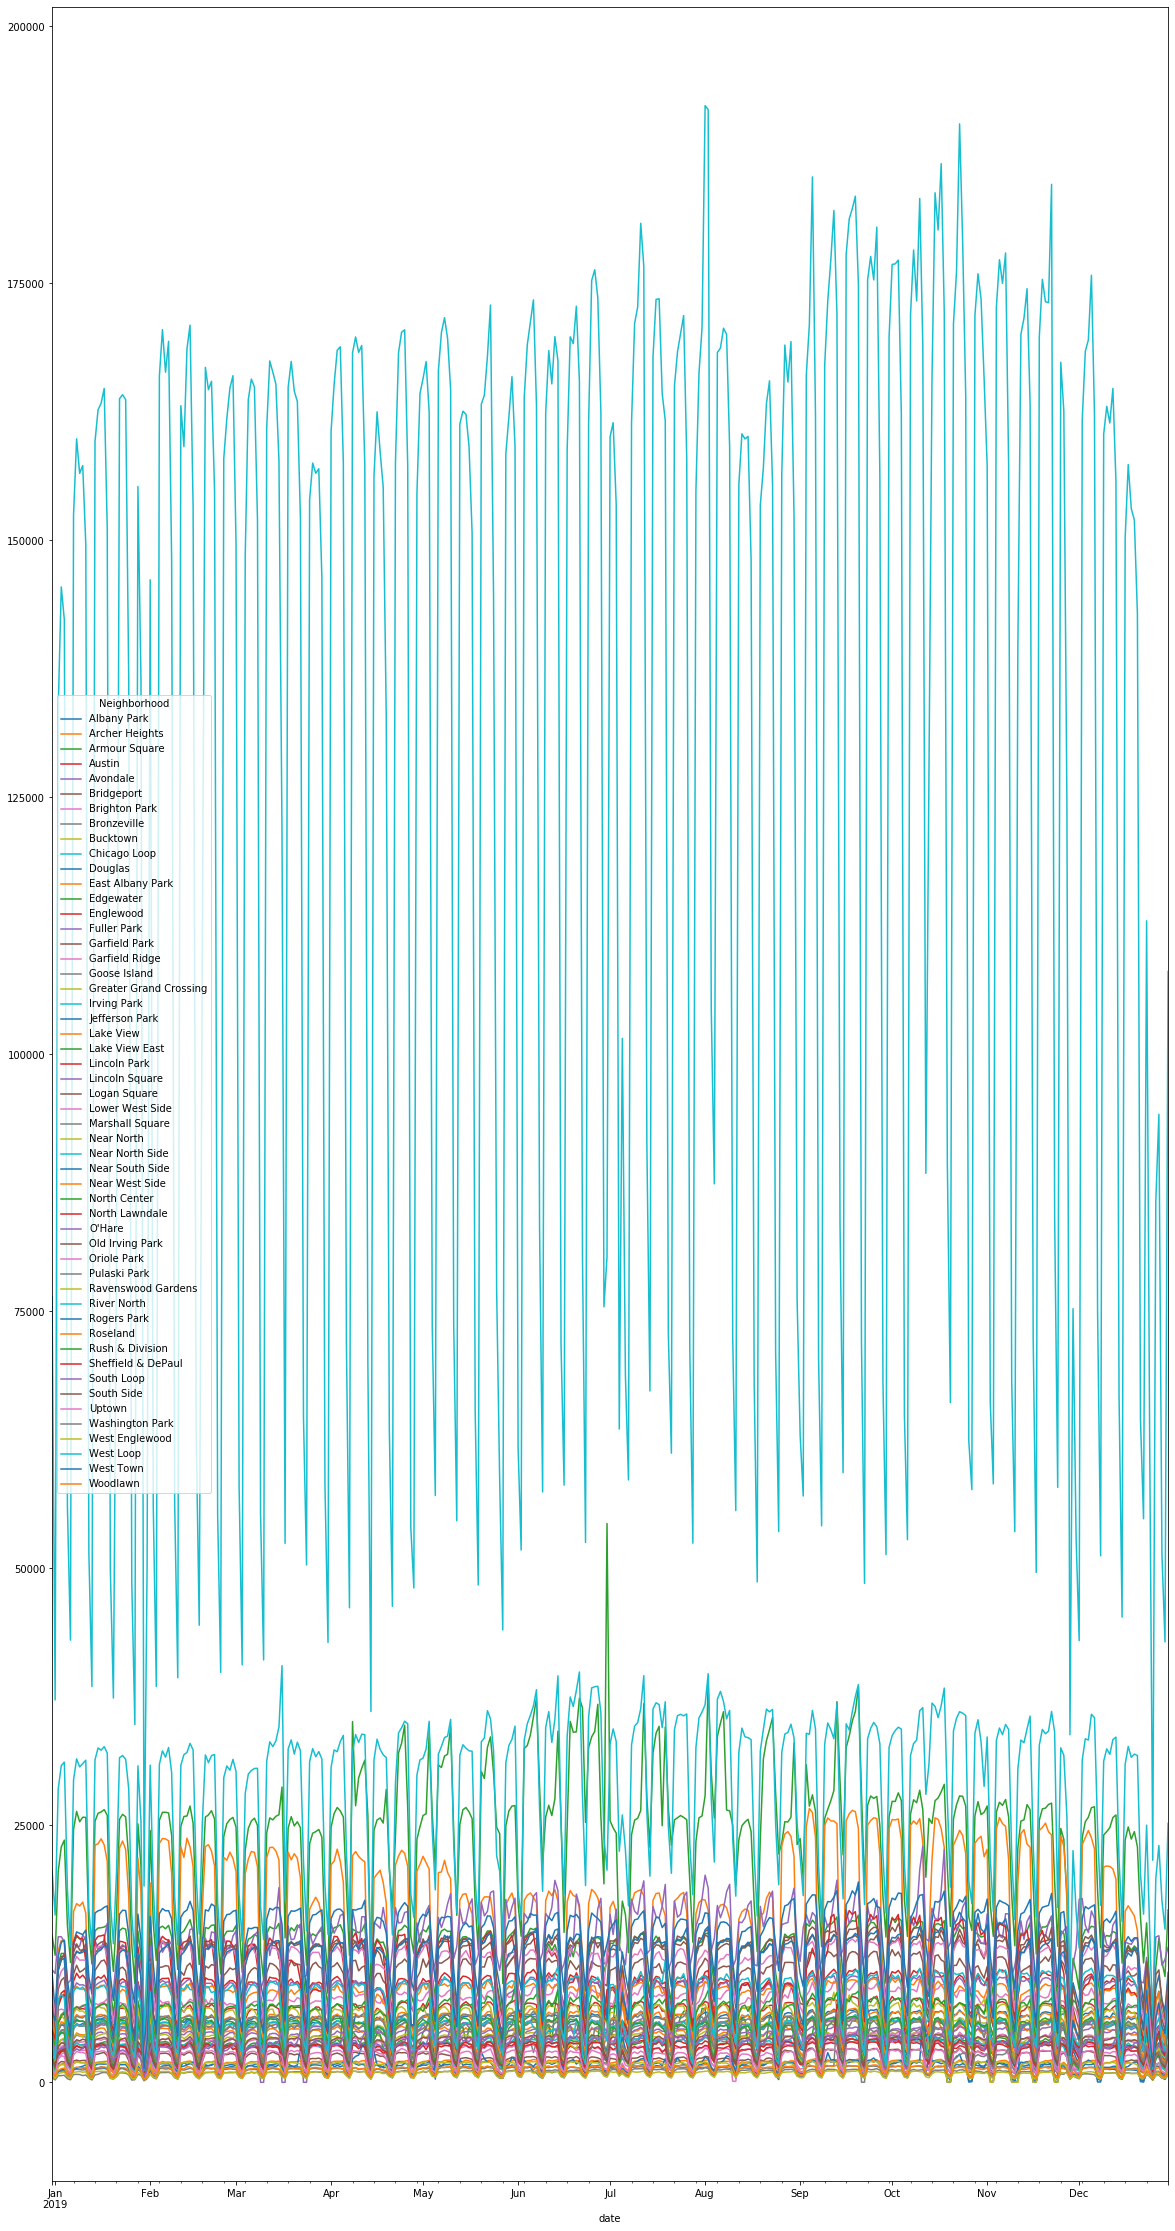

In [95]:
#L_data_3_yr["Neighborhood"]
#ax = L_data_3_yr.groupby('Neighborhood')[['date', 'rides']].plot(x = 'yq', kind='bar')


#df_grouped = L_data_3_yr.groupby('Neighborhood')
#for key, group in df_grouped:
#   group.groupby('date')['rides'].sum().plot(ax=ax,label=key)



fig, ax = plt.subplots(figsize=(20,40))
# use unstack()
L_data_1_yr.groupby(['date','Neighborhood']).sum()['rides'].unstack().plot(ax=ax)



#n_3y_plot = L_data_3_yr.groupby(['Neighborhood','date'])['rides'].sum()
#plot_df = n_3y_plot.unstack('Neighborhood').loc[:, 'rides']
#plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq='A')
#plot_df.plot()



In [96]:
#verify the 


L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'Chicago Loop', 'rides'].sum()


47658171

In [97]:
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'Archer Heights', 'rides'].sum()

1465419

In [98]:
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'East Albany Park', 'rides'].sum()

617842

In [99]:
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'Lake View', 'rides'].sum()

1933905

In [100]:
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'Near West Side', 'rides'].sum()

5775474

In [101]:
#green
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'Woodlawn', 'rides'].sum()

442000

In [102]:
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'Lake View East', 'rides'].sum()

8743298

In [103]:
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'North Center', 'rides'].sum()

1671162

In [104]:
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'Avondale', 'rides'].sum()

1459615

In [105]:
#green
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'Armour Square', 'rides'].sum()

1390910

In [106]:
#orange
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'Lake View', 'rides'].sum()

1933905

In [107]:
#purple
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == "O'Hare", 'rides'].sum()

5050911

In [108]:
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == 'Roseland', 'rides'].sum()

2818751

In [109]:
top_five_1y = L_data_1_yr.loc[(L_data_1_yr['Neighborhood'] == 'Chicago Loop')|(L_data_1_yr['Neighborhood'] == 'River North')|(L_data_1_yr['Neighborhood'] == "Lake View East")|(L_data_1_yr['Neighborhood'] == "O'Hare")|(L_data_1_yr['Neighborhood'] == "Near West Side")] 

In [110]:
print(top_five_1y)

             date daytype  rides  \
932291 2018-12-31       W   3310   
932384 2018-12-31       W   2708   
932415 2018-12-31       W   2887   
932632 2018-12-31       W   1549   
932818 2018-12-31       W    887   
...           ...     ...    ...   
988852 2019-12-26       W   8264   
988853 2019-12-27       W   7871   
988854 2019-12-28       A   4474   
988855 2019-12-29       U   3750   
988856 2019-12-30       W   7885   

                                             Station Name    ADA    RED  \
932291  Quincy/Wells (Brown, Orange, Purple & Pink Lines)  False  False   
932384                                Jackson (Blue Line)   True  False   
932415                                Sheridan (Red Line)  False  False   
932632  LaSalle/Van Buren (Brown, Orange, Purple & Pin...  False  False   
932818           Western (Blue Line - Forest Park Branch)  False  False   
...                                                   ...    ...    ...   
988852  Washington/Wabash (Brown, Green, O

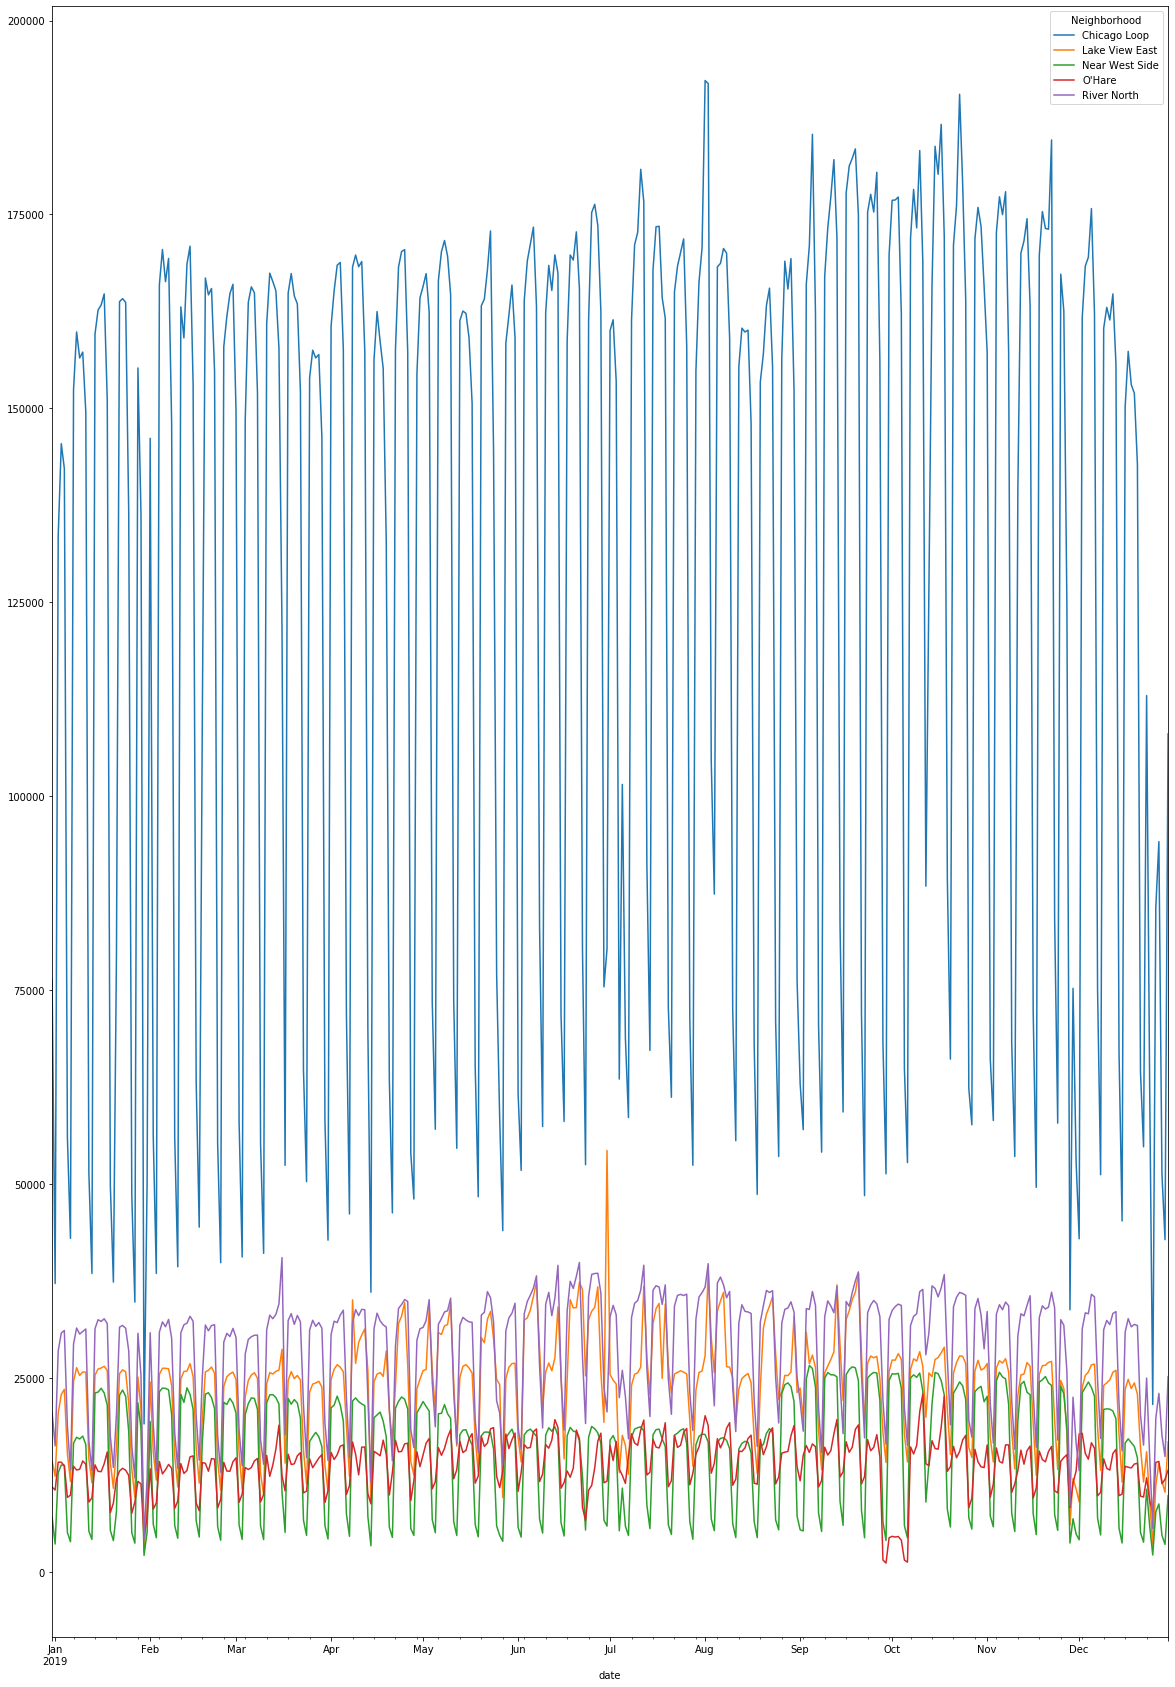

In [111]:
fig, ax = plt.subplots(figsize=(20,30))
# use unstack()
top_five_1y.groupby(['date','Neighborhood']).sum()['rides'].unstack().plot(ax=ax)

In [112]:
worst_five_1y = L_data_1_yr.loc[(L_data_1_yr['Neighborhood'] == 'North Center')|(L_data_1_yr['Neighborhood'] == 'Roseland')|(L_data_1_yr['Neighborhood'] == 'North Center')|(L_data_1_yr['Neighborhood'] == "Armour Square")|(L_data_1_yr['Neighborhood'] == 'Avondale')|(L_data_1_yr['Neighborhood'] == 'Near North Side')] 

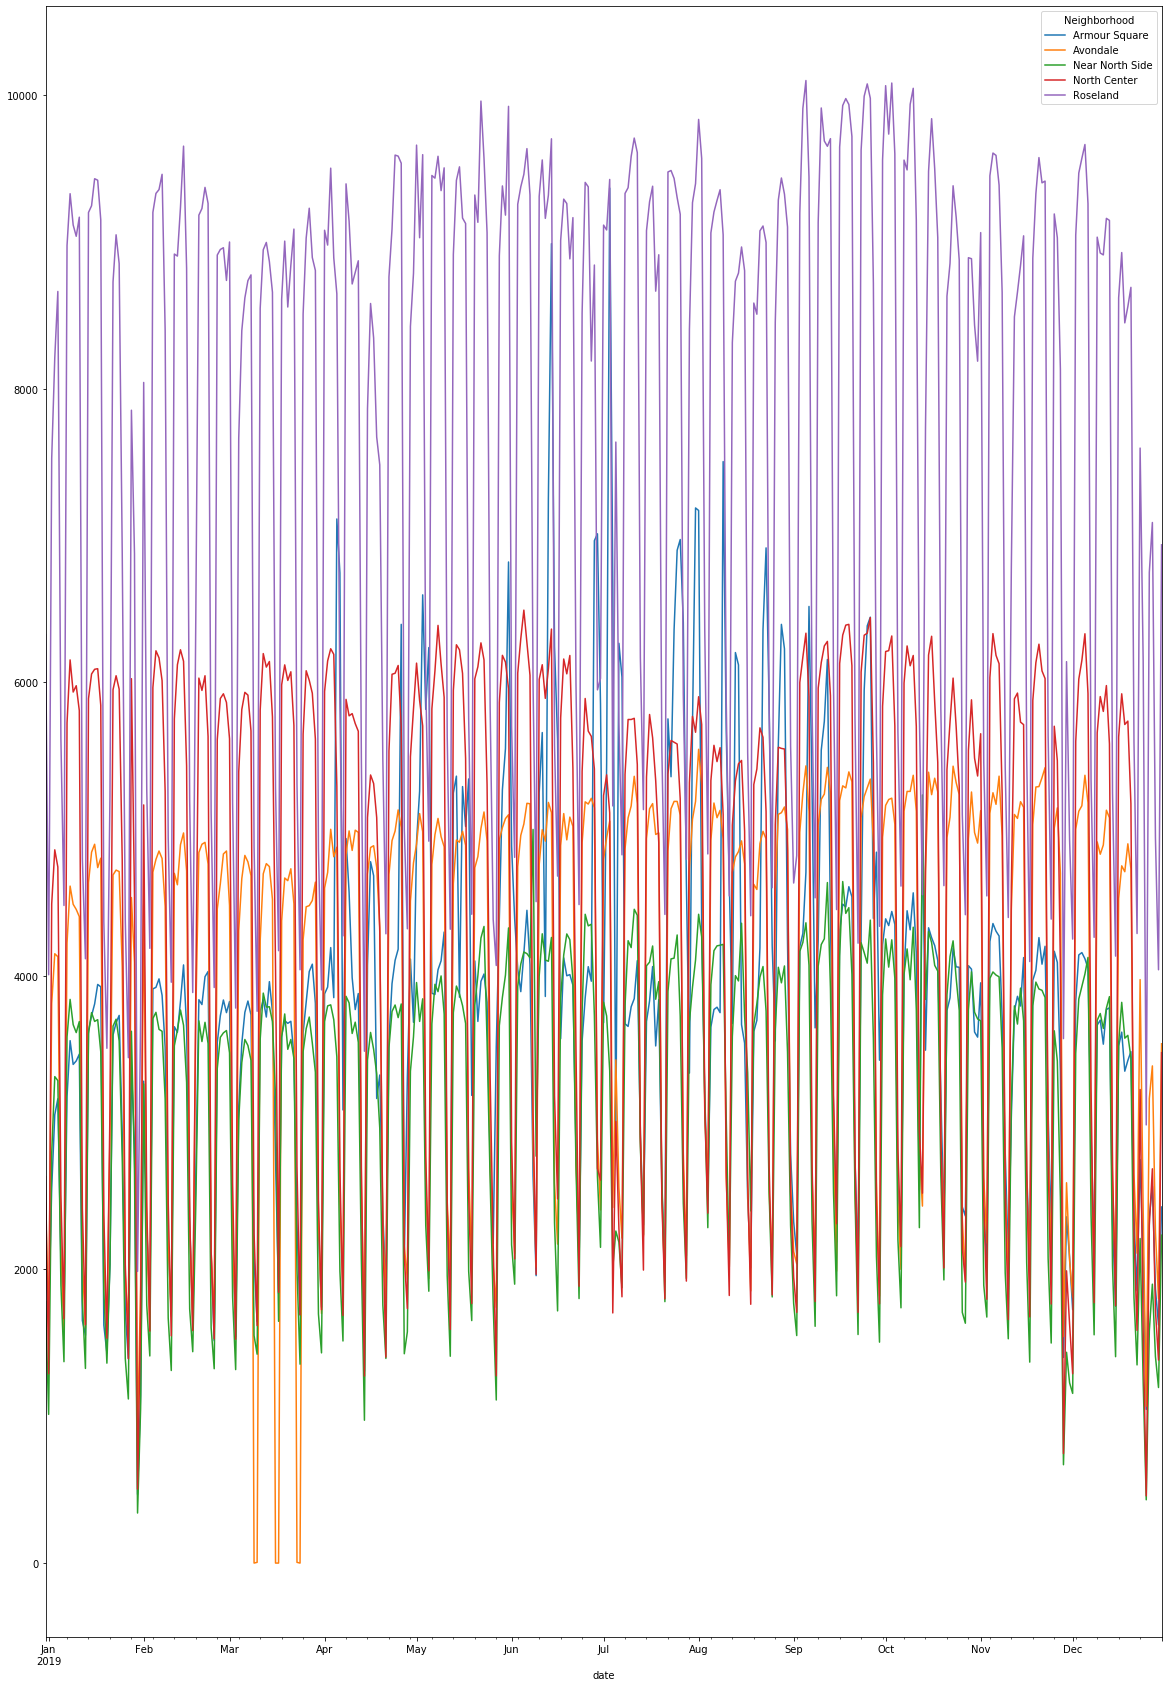

In [113]:
fig, ax = plt.subplots(figsize=(20,30))
# use unstack()
worst_five_1y.groupby(['date','Neighborhood']).sum()['rides'].unstack().plot(ax=ax)

In [114]:
L_data_2020 = L_data.loc[L_data['date']>= '01-01-2020']
L_data_2020

,date,daytype,rides,Station Name,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,Neighborhood,City
988858,2020-01-01,U,556,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
988859,2020-01-02,W,1362,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
988860,2020-01-03,W,1363,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
988861,2020-01-04,A,572,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
988862,2020-01-05,U,484,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006156,2020-04-26,U,419,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
1006157,2020-04-27,W,883,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
1006158,2020-04-28,W,880,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
1006159,2020-04-29,W,768,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago


In [115]:
top_five_covid = L_data_2020.loc[(L_data_2020['Neighborhood'] == 'Chicago Loop')|(L_data_2020['Neighborhood'] == 'River North')|(L_data_2020['Neighborhood'] == "Lake View East")|(L_data_2020['Neighborhood'] == "O'Hare")|(L_data_2020['Neighborhood'] == "Near West Side")] 

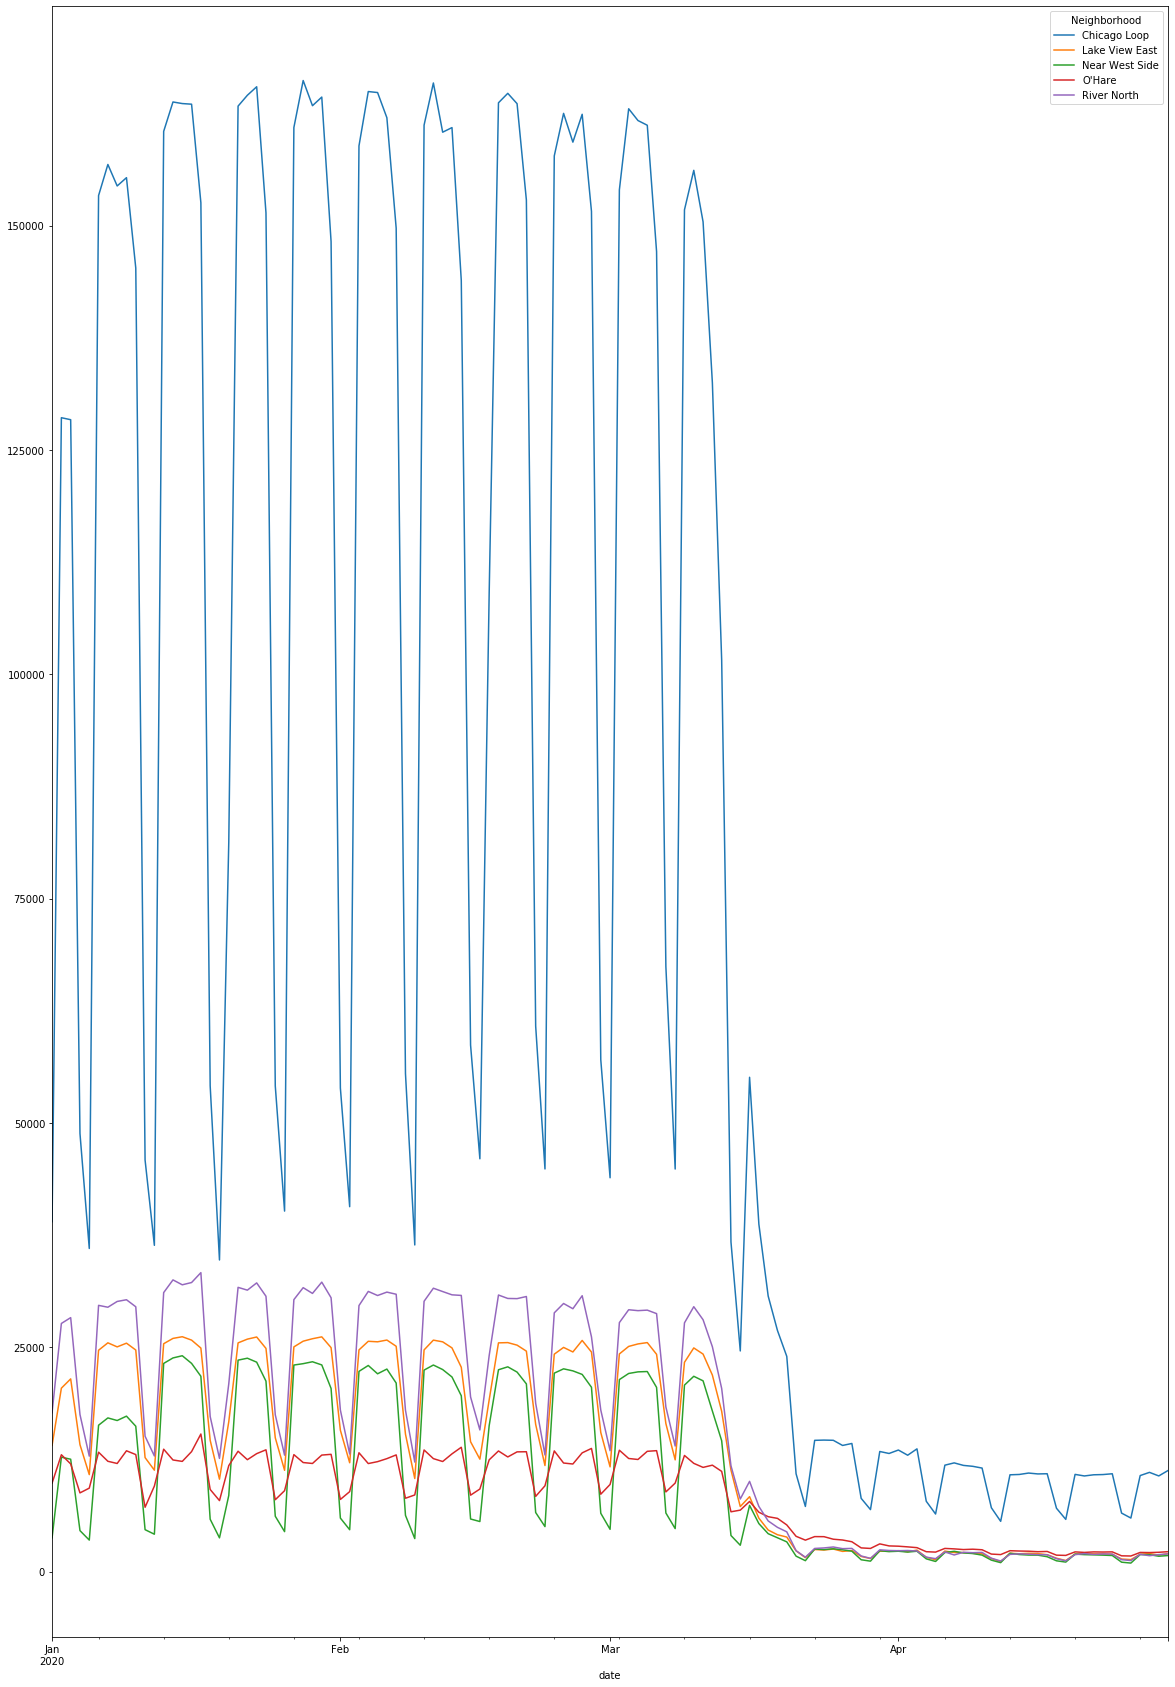

In [116]:
fig, ax = plt.subplots(figsize=(20,30))
# use unstack()
top_five_covid.groupby(['date','Neighborhood']).sum()['rides'].unstack().plot(ax=ax)


In [117]:
worst_five_covid = L_data_2020.loc[(L_data_2020['Neighborhood'] == 'North Center')|(L_data_2020['Neighborhood'] == 'Roseland')|(L_data_2020['Neighborhood'] == 'North Center')|(L_data_2020['Neighborhood'] == "Armour Square")|(L_data_2020['Neighborhood'] == 'Avondale')|(L_data_2020['Neighborhood'] == 'Near North Side')] 

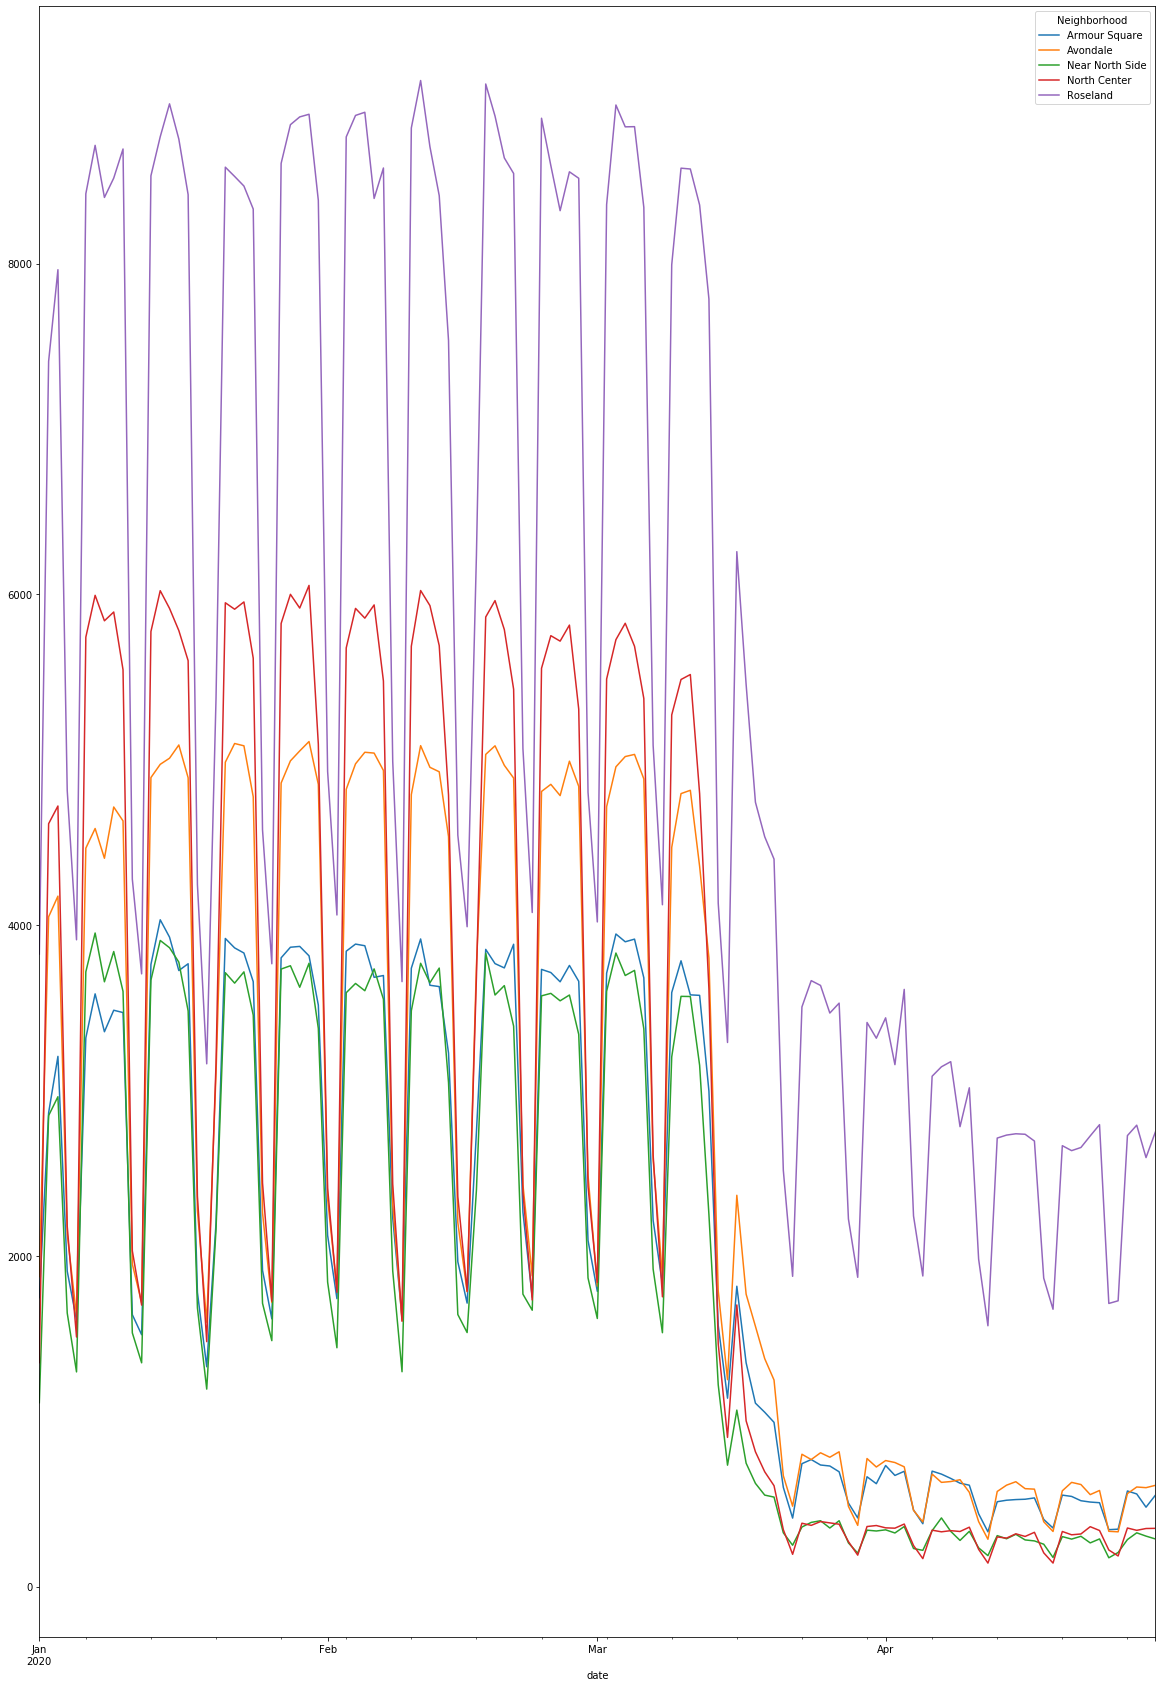

In [118]:
fig, ax = plt.subplots(figsize=(20,30))
# use unstack()
worst_five_covid.groupby(['date','Neighborhood']).sum()['rides'].unstack().plot(ax=ax)

In [119]:
lines = top_five_1y.groupby([pd.Grouper(key='date', freq = 'W') ,pd.Grouper('Neighborhood')]).agg({
    'rides': 'sum'
})
#lines


df_top_5 = pd.DataFrame(lines)
df_top_5
#lines1 = top_five_1y.groupby(pd.Grouper(key='date', freq = 'W').agg({
#    'rides': 'sum'
#})
#lines1

rides
date       Neighborhood          
2019-01-06 Chicago Loop    633973
           Lake View East  120567
           Near West Side   60145
           O'Hare           83102
           River North     159329
...                           ...
2020-01-05 Chicago Loop    108045
           Lake View East   16776
           Near West Side    9839
           O'Hare           13135
           River North      25195

[265 rows x 1 columns]

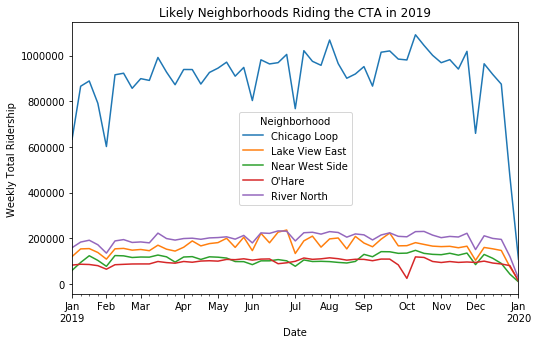

In [176]:
fig, ax = plt.subplots(figsize=(8,5))
# use unstack()
df_top_5.groupby(['date','Neighborhood']).sum()['rides'].unstack().plot(ax=ax)
#ax.set_xlabel('Weekly Total Ridership', fontsize='large', fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Total Ridership')
ax.set_title('Likely Neighborhoods Riding the CTA in 2019')
plt.savefig("Images/Top Five Most Likely Neighborhoods Riding the CTA'L'.png")
plt.show()



#fig, ax = plt.subplots(figsize=(20,30))
# use unstack()
#lines.unstack().plot(ax=ax)
#lines.unstack().plot(ax=ax)

## Analysis 

The Chicago Loop has the most used neighborhood. This is because the Chicago Loop is a total of 18 stations in the Chicago Loop veruses the other neighborhoods which have fewer number of stations. River North has a total of 3 and Lake View East has 4 stations, O'Hare has 2 stations and Near West Side has a total of 6 stations. 

In [123]:
lines1 = worst_five_1y.groupby([pd.Grouper(key='date', freq = 'W') ,pd.Grouper('Neighborhood')]).agg({
    'rides': 'sum'
})
lines1


df_worst_5 = pd.DataFrame(lines1)
df_worst_5

rides
date       Neighborhood          
2019-01-06 Armour Square    16412
           Avondale         19853
           Near North Side  15454
           North Center     22187
           Roseland         44828
...                           ...
2020-01-05 Armour Square     2426
           Avondale          3538
           Near North Side   2234
           North Center      3477
           Roseland          6937

[265 rows x 1 columns]

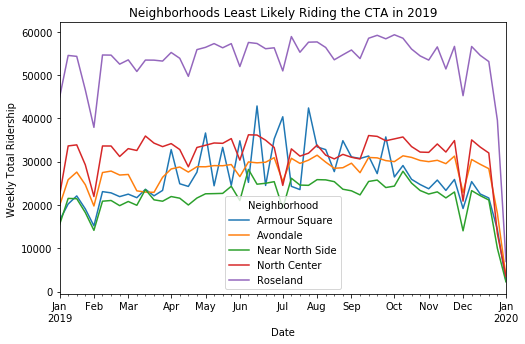

In [178]:
fig, ax = plt.subplots(figsize=(8,5))
# use unstack()
df_worst_5.groupby(['date','Neighborhood']).sum()['rides'].unstack().plot(ax=ax)
ax.set_ylabel('Weekly Total Ridership')
ax.set_xlabel('Date')
ax.set_title('Neighborhoods Least Likely Riding the CTA in 2019')
plt.savefig("Images/Top Five Least Likely Neighborhoods Riding the CTA'L'.png")
plt.show()


## Analysis

All othese neighborhoods only have 1 station within their neighborhood. This might be why these neighborhoods have a lower ridership versus other neighborhoods. Roseland is located near the South Side and maybe the CTA their main source of transportation. 



In [125]:
lines2 = top_five_covid.groupby([pd.Grouper(key='date', freq = 'W') ,pd.Grouper('Neighborhood')]).agg({
    'rides': 'sum'
})
#lines2


df_top_five_covid = pd.DataFrame(lines2)
df_top_five_covid

rides
date       Neighborhood          
2020-01-05 Chicago Loop    380764
           Lake View East   80890
           Near West Side   37071
           O'Hare           52909
           River North     103985
...                           ...
2020-05-03 Chicago Loop     43652
           Lake View East    7735
           Near West Side    7246
           O'Hare            8591
           River North       7516

[90 rows x 1 columns]

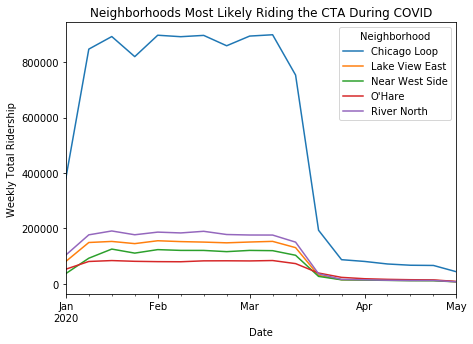

In [169]:
fig, ax = plt.subplots(figsize=(7,5))
# use unstack()
df_top_five_covid.groupby(['date','Neighborhood']).sum()['rides'].unstack().plot(ax=ax)
ax.set_ylabel('Weekly Total Ridership')
ax.set_xlabel('Date')
ax.set_title('Neighborhoods Most Likely Riding the CTA During COVID')
plt.savefig("Images/Top Five Most Likely Neighborhoods Riding the CTA'L' COVID.png")
plt.show()


## Analysis 

In general due to the travel restrictions there is a huge drop in CTA travel ridership.

In [127]:
lines3 = worst_five_covid.groupby([pd.Grouper(key='date', freq = 'W') ,pd.Grouper('Neighborhood')]).agg({
    'rides': 'sum'
})
#lines3


df_worst_five_covid = pd.DataFrame(lines3)
df_worst_five_covid

rides
date       Neighborhood          
2020-01-05 Armour Square    11337
           Avondale         13869
           Near North Side   9874
           North Center     14375
           Roseland         27922
...                           ...
2020-05-03 Armour Square     2170
           Avondale          2374
           Near North Side   1202
           North Center      1397
           Roseland         10859

[90 rows x 1 columns]

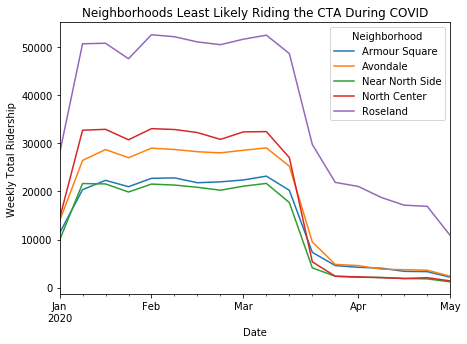

In [170]:
fig, ax = plt.subplots(figsize=(7,5))
# use unstack()
df_worst_five_covid.groupby(['date','Neighborhood']).sum()['rides'].unstack().plot(ax=ax)
ax.set_ylabel('Weekly Total Ridership')
ax.set_xlabel('Date')
ax.set_title('Neighborhoods Least Likely Riding the CTA During COVID')
plt.savefig("Images/Top Five Least Likely Neighborhoods Riding the CTA'L' COVID.png")
plt.show()


In [42]:
#plt.bar(ni, energy, color='green')

In [208]:
#for n in top_five_1y["Neighborhood"] == 'Chicago Loop':
#    print(top_five_1y["Station Name"].nunique())
    
L_data_1_yr.loc[L_data_1_yr['Neighborhood'] == "Roseland", 'Station Name'].nunique()


1

In [204]:
#worst_five_1y.loc[L_data_1_yr['Neighborhood'] == "Armor Square", 'Station Name'].nunique()

0

In [ ]:
#guess percentage of people who got on each stop. divide by people from each L line. 
#better guess of how many are really riding each line. 